In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to fit the MLP input (flatten 28x28 images to 784-dimensional vectors)
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [29]:
from sklearn.model_selection import train_test_split

# Split the training set into 80% train and 20% validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [30]:
model = models.Sequential([
    layers.Input(shape=(784,)),  # Input layer
    layers.Dense(128, activation='relu'),  # First hidden layer
    layers.Dense(64, activation='relu'),  # Second hidden layer
    layers.Dense(10, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Training with SGD (batch_size = 1):
Epoch 1/20
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 221s 5ms/step - accuracy: 0.9479 - loss: 0.1747 - val_accuracy: 0.9566 - val_loss: 0.1395
Epoch 2/20
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 218s 4ms/step - accuracy: 0.9691 - loss: 0.0983 - val_accuracy: 0.9704 - val_loss: 0.0992
Epoch 3/20
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 117s 2ms/step - accuracy: 0.9743 - loss: 0.0782 - val_accuracy: 0.9628 - val_loss: 0.1253
Epoch 4/20
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 116s 2ms/step - accuracy: 0.9825 - loss: 0.0543 - val_accuracy: 0.9691 - val_loss: 0.1055
Epoch 5/20
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 104s 2ms/step - accuracy: 0.9847 - loss: 0.0461 - val_accuracy: 0.9717 - val_loss: 0.0992
Epoch 6/20
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 115s 2ms/step - accuracy: 0.9873 - loss: 0.0370 - val_accuracy: 0.9742 - val_loss: 0.1016
Epoch 7/20
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 124s 3ms/step - accuracy: 0.9896 - loss: 0.0315 - val_accuracy: 0.9768 - val_loss: 0.0933
Epoch 8/20
48000/48000 ━━━

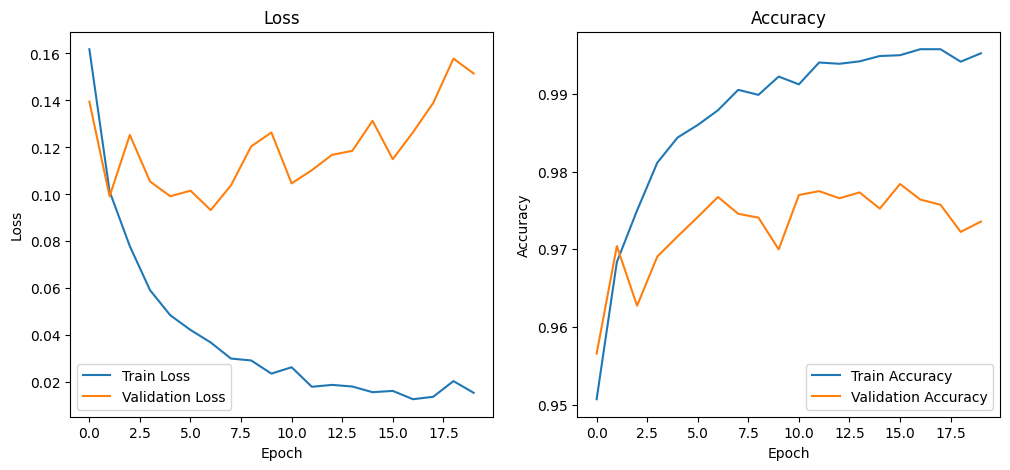

Training with Mini-Batch SGD (batch_size = 64):
Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9957 - loss: 0.0127 - val_accuracy: 0.9782 - val_loss: 0.1179
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9990 - loss: 0.0044 - val_accuracy: 0.9789 - val_loss: 0.1122
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9994 - loss: 0.0033 - val_accuracy: 0.9792 - val_loss: 0.1100
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9997 - loss: 0.0021 - val_accuracy: 0.9797 - val_loss: 0.1089
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9996 - loss: 0.0021 - val_accuracy: 0.9797 - val_loss: 0.1082
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9999 - loss: 0.0015 - val_accuracy: 0.9798 - val_loss: 0.1078
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9998 - loss: 0.0020 - val_accuracy: 0.9796 - val_loss: 0.1076
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - ac

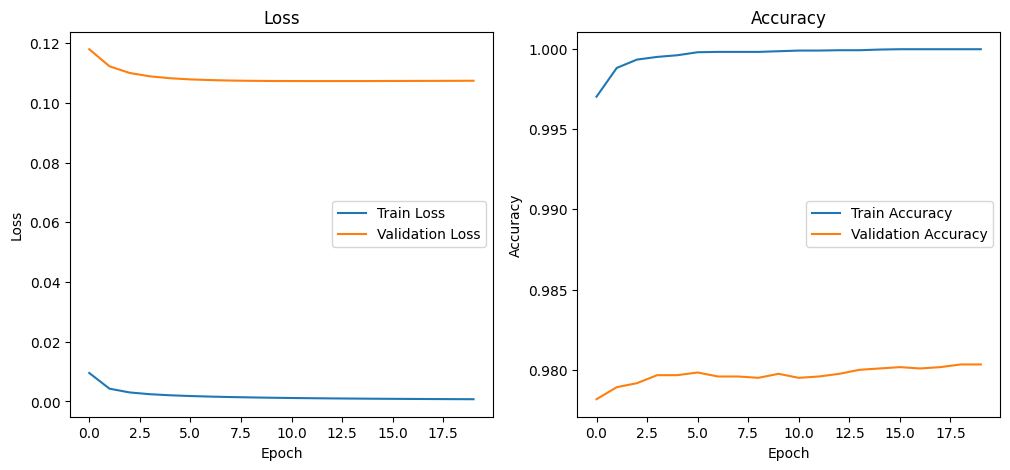

Training with Batch SGD (batch_size = len(x_train)):
Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 1.0000 - loss: 7.2558e-04 - val_accuracy: 0.9803 - val_loss: 0.1074
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 1.0000 - loss: 7.2555e-04 - val_accuracy: 0.9803 - val_loss: 0.1074
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 1.0000 - loss: 7.2551e-04 - val_accuracy: 0.9803 - val_loss: 0.1074
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 1.0000 - loss: 7.2548e-04 - val_accuracy: 0.9803 - val_loss: 0.1074
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 1.0000 - loss: 7.2545e-04 - val_accuracy: 0.9803 - val_loss: 0.1074
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 1.0000 - loss: 7.2542e-04 - val_accuracy: 0.9803 - val_loss: 0.1074
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 1.0000 - loss: 7.2539e-04 - val_accuracy: 0.9803 - val_loss: 0.1074
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

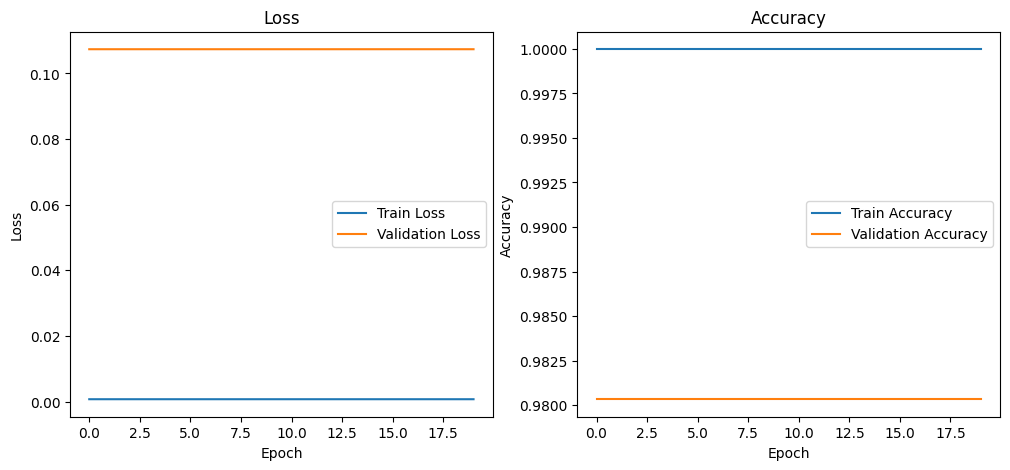

In [32]:
import time  # Import the time module

# Define a function to train and plot learning curves
def train_and_plot(model, x_train, y_train, x_val, y_val, optimizer, batch_size, epochs=20):
    # Record the start time
    start_time = time.time()
    
    # Train the model
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                        validation_data=(x_val, y_val), verbose=1)
    
    # Record the end time
    end_time = time.time()
    
    # Calculate the training time
    training_time = end_time - start_time
    print(f"Training time: {training_time:.2f} seconds")
    
    # Plot learning curves
    plt.figure(figsize=(12, 5))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()

# Train with SGD (batch_size = 1)
print("Training with SGD (batch_size = 1):")
train_and_plot(model, x_train, y_train, x_val, y_val, optimizer='sgd', batch_size=1)

# Train with Mini-Batch SGD (batch_size = 64)
print("Training with Mini-Batch SGD (batch_size = 64):")
train_and_plot(model, x_train, y_train, x_val, y_val, optimizer='sgd', batch_size=64)

# Train with Batch SGD (batch_size = len(x_train))
print("Training with Batch SGD (batch_size = len(x_train)):")
train_and_plot(model, x_train, y_train, x_val, y_val, optimizer='sgd', batch_size=len(x_train))